In [198]:
%pylab inline
import scipy.stats
dshield = sc.textFile("/Users/lguan/Documents/data/dshield/daily/daily_sources20150523").filter(lambda s: not s.startswith('#'))
dshield.first()

Populating the interactive namespace from numpy and matplotlib


u'184.105.139.67,161,17,50758,50733,02:23:17,07:25:53'

In [305]:
# 
attracks = array(dshield.map(lambda s: (s.split(',')[0], 1)) \
                 .reduceByKey(lambda x, y: x + y) \
                 .filter(lambda x: x[1] > 20) \
                 .map(lambda x: x[1]).collect())

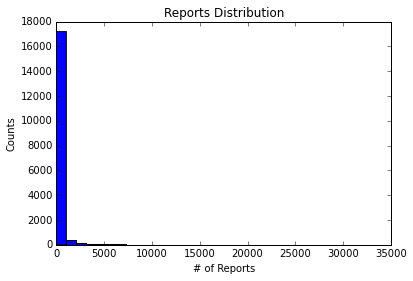

In [306]:
counts, bins, patches = plt.hist(reports, bins = 30, range=[min(attracks), max(attracks)])
plt.title('Reports Distribution')
plt.xlabel('# of Reports')
plt.ylabel('Counts')
plt.show()

In [304]:
# stats.percentileofscore(attracks, 2, 'rank')
import scipy.stats as stats
for i in  range(50):
    index = i + 1
    value = i + 2
    print index, stats.percentileofscore(attracks, index, 'rank')

1 0.0
2 36.1141412138
3 77.1097778659
4 84.3613645379
5 87.9412931376
6 90.1039600688
7 91.5790691525
8 92.523634801
9 93.2268940896
10 93.7599166997
11 94.178897263
12 94.5210234034
13 94.8474481026
14 95.1143726035
15 95.3350191723
16 95.5399642999
17 95.7382982943
18 95.9192780643
19 96.0779452598
20 96.2275221473
21 96.3630503768
22 96.4688285072
23 96.5696482877
24 96.6712944599
25 96.7597183657
26 96.856406188
27 96.9382189607
28 96.9952399841
29 97.0638304905
30 97.1349001719
31 97.1910948036
32 97.2406783023
33 97.2935673674
34 97.3547203491
35 97.4109149808
36 97.4588456962
37 97.5076028031
38 97.5497487769
39 97.5885891842
40 97.6290823747
41 97.6712283485
42 97.7059367976
43 97.7323813302
44 97.7670897792
45 97.8059301864
46 97.8406386355
47 97.8736943012
48 97.9059235753
49 97.9282361497
50 97.9563334656


In [287]:
reports = array(dshield.map(lambda s: (s.split(',')[0], int(s.split(',')[3]))) \
                .reduceByKey(lambda x, y : x + y).map(lambda x: int(x[1])) \
                .filter(lambda x : x > 9) \
                .collect())

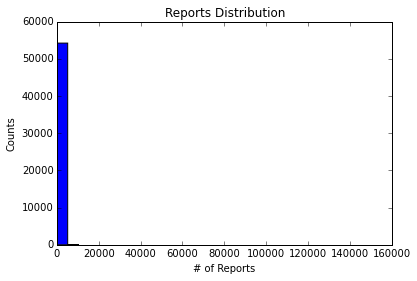

In [288]:
# max(reports)
# reports.size
counts, bins, patches = plt.hist(reports, bins = 30, range=[min(reports), max(reports)])
plt.title('Reports Distribution')
plt.xlabel('# of Reports')
plt.ylabel('Counts')
plt.show()

In [250]:
min(reports)

1

In [256]:
print('{}, {}, {}, {}, {}, {}, {}, {}'.format(min(reports), np.percentile(reports, 25), np.percentile(reports, 50), np.percentile(reports, 75), np.percentile(reports, 90), np.percentile(reports, 95), np.percentile(reports, 99), max(reports)))

1, 1.0, 1.0, 4.0, 10.0, 16.0, 101.0, 154631


In [290]:
import scipy.stats as stats
for i in  range(50):
    index = i + 1 + 10
    value = i + 2 + 10
    print index, stats.percentileofscore(reports, value, 'rank')

11 27.4901896065
12 35.5136245278
13 41.7977775333
14 47.1338981186
15 51.8419701471
16 55.728536326
17 59.270363443
18 62.7727656141
19 65.5811053655
20 67.6990501339
21 69.5391865625
22 71.1005977922
23 72.5409836066
24 73.862177724
25 74.9559907581
26 75.9773719148
27 76.9409909414
28 77.7432427476
29 78.4895661422
30 79.2019657461
31 79.7539149888
32 80.2627718488
33 80.8147210914
34 81.3107419225
35 81.8012615983
36 82.2963655701
37 82.7309568343
38 83.1380423222
39 83.5130377379
40 83.8348553196
41 84.1355851395
42 84.4308138042
43 84.7205413137
44 85.0194374152
45 85.2807422892
46 85.4980379213
47 85.7272527231
48 85.9619686801
49 86.1801811714
50 86.3791396193
51 86.5615946015
52 86.7202112444
53 86.8623244215
54 87.0145230498
55 87.1593868046
56 87.2776616423
57 87.39593648
58 87.519712473
59 87.6425716067
60 87.7608464444


##### 

In [29]:
targets = array(dshield.filter(lambda s: not s.startswith('#')).map(lambda s: int(s.split(',')[4])).collect())
targets.size
plt.hist(targets)
plt.title('targets distribution')
plt.xlabel('# of targets')
plt.ylabel('counts')
plt.show()

0

99.919849884632995

In [112]:
np.percentile(reports, 99)

34.0

In [54]:
bins

array([  1.00000000e+00,   4.51710000e+03,   9.03320000e+03,
         1.35493000e+04,   1.80654000e+04,   2.25815000e+04,
         2.70976000e+04,   3.16137000e+04,   3.61298000e+04,
         4.06459000e+04,   4.51620000e+04,   4.96781000e+04,
         5.41942000e+04,   5.87103000e+04,   6.32264000e+04,
         6.77425000e+04,   7.22586000e+04,   7.67747000e+04,
         8.12908000e+04,   8.58069000e+04,   9.03230000e+04])

In [56]:
patches[0]

In [74]:
reports

array([50758, 60678, 54359, 45497, 39132, 40961, 35604, 40809, 31620,
       27785, 19713, 18735, 18635, 19714, 17315, 27485, 25216, 12836,
       12986, 15643, 12856, 11014, 10655, 10107, 10009,  9961,  9910,
        9731,  9737,  9726,  9712, 11344,  9710,  9640,  9618,  9595,
       10149,  9527, 10852,  9519,  9495,  9341,  9358,  9215,  9195,
        9155, 11140,  8769,  8734,  8548, 13667,  8405,  8329,  8096,
       13095,  8078,  8070,  8023,  8008,  7954,  7952,  7949, 11000,
        7883,  7823,  7704,  7682, 12748,  7658,  7641,  7621,  7591,
        7588,  7580,  7551,  7479,  7479, 12293,  7401,  7357,  7280,
       12711,  7241,  7542,  7229,  6956,  6841,  6749,  6427,  6253,
        7895,  6193,  5915,  5828,  5722,  5697,  5582,  5437,  5320,  6002])

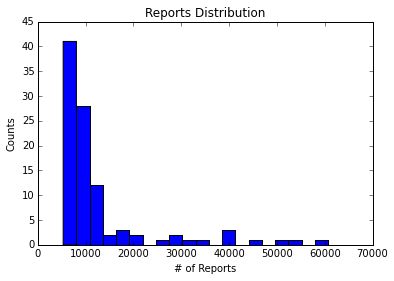

In [81]:
data = array([50758, 60678, 54359, 45497, 39132, 40961, 35604, 40809, 31620,
       27785, 19713, 18735, 18635, 19714, 17315, 27485, 25216, 12836,
       12986, 15643, 12856, 11014, 10655, 10107, 10009,  9961,  9910,
        9731,  9737,  9726,  9712, 11344,  9710,  9640,  9618,  9595,
       10149,  9527, 10852,  9519,  9495,  9341,  9358,  9215,  9195,
        9155, 11140,  8769,  8734,  8548, 13667,  8405,  8329,  8096,
       13095,  8078,  8070,  8023,  8008,  7954,  7952,  7949, 11000,
        7883,  7823,  7704,  7682, 12748,  7658,  7641,  7621,  7591,
        7588,  7580,  7551,  7479,  7479, 12293,  7401,  7357,  7280,
       12711,  7241,  7542,  7229,  6956,  6841,  6749,  6427,  6253,
        7895,  6193,  5915,  5828,  5722,  5697,  5582,  5437,  5320,  6002])
plt.hist(data, bins = 20, range=[min(data) - 10, max(data) + 10])
# plt.xticks(arange(20))
plt.title('Reports Distribution')
plt.xlabel('# of Reports')
plt.ylabel('Counts')
plt.show()

In [104]:
print('{}, {}, {}, {}, {}'.format(min(data), np.percentile(data, 25), np.percentile(data, 50), np.percentile(data, 75), max(data)))


5320, 7590.25, 9278.0, 12397.5, 60678


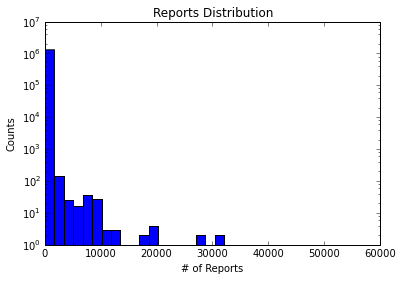

In [127]:
reports_large = array(dshield.filter(lambda s: not s.startswith('#')).map(lambda s: int(s.split(',')[4])).filter(lambda s: s > 0).collect())
reports_large.size
counts, bins, patches = plt.hist(reports_large, bins = 30, range=[min(reports_large), max(reports_large)])
plt.yscale('log')
plt.title('Reports Distribution')
plt.xlabel('# of Reports')
plt.ylabel('Counts')
plt.show()

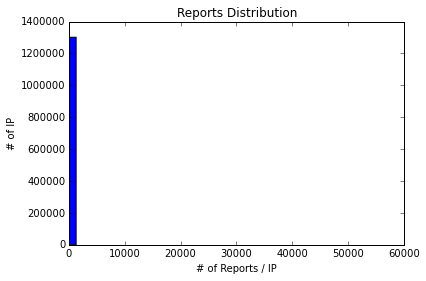

In [168]:
attack_ip = array(dshield.filter(lambda s: not s.startswith('#')).filter(lambda s: (int(s.split(',')[3]) / int(s.split(',')[4])) > 0).map(lambda s: int(s.split(',')[3]) / int(s.split(',')[4])).collect())
plt.hist(attack_ip, bins = 40, range=[min(attack_ip), max(attack_ip)])
# # plt.yscale('log')
plt.title('Reports Distribution')
plt.xlabel('# of Reports / IP')
plt.ylabel('# of IP')
plt.show()

In [152]:
attack_ip = array(dshield.filter(lambda s: not s.startswith('#')).map(lambda s: int(s.split(',')[3]) / int(s.split(',')[4])).collect())
np.percentile(attack_ip, 99)

11.0

In [151]:
attack_ip = array(dshield.filter(lambda s: not s.startswith('#')).map(lambda s: int(s.split(',')[3]) / int(s.split(',')[4])).collect())
stats.percentileofscore(attack_ip, 1000, 'rank')

99.992933578712254

In [180]:
dshield.filter(lambda s: not s.startswith('#')).filter(lambda s: (int(s.split(',')[3]) / int(s.split(',')[4])) > 50).map(lambda x : x.split(',')[3:5]).count()

1619

In [184]:
dshield.filter(lambda s: not s.startswith('#')).filter(lambda s: (int(s.split(',')[3]) / int(s.split(',')[4])) > 50 and int(s.split(',')[4]) > 1).count()

112